# Analysing the COVID-19 pandemic in Bosnia and Herzegovina

The analysie will be preformed on a dataset gathered from the <a href="https://www.who.int/">WHO</a> website. The first part of this analysis will be data cleaning, wich is the most important part of data analysis. You know how they say it if the data is not clean we get garbage in and garbage out.

The next part will contain visualizations to get a more understanding picture of the situation so we can preform some statistical methods later. 

After we finished the data cleaning and visualization process will continue on data modeling so we can make predictions in the later part when we will actualy use our data to make predictions on how the situation will improve or not in the future.

When all of this is set and done we will make the conclusion and suggest how things can be done in the future to improve the situation.

## Table of Contetn's

* [Importing the nececery Libraries](#importing-the-nececery-libraries)
* [Data import and exploration](#data-import-and-exploration)

## Importing the nececery Libraries

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set()

## Data import and exploration

In [2]:
rawData = pd.read_excel(os.path.join("../dataSet/rawData/", "mbih.xlsx"), engine='openpyxl')

In [3]:
rawData.head()

,Unnamed: 0,date,total_cases,new_cases,population
0,6498,2020-03-05,2,2,3280815
1,6499,2020-03-06,2,0,3280815
2,6500,2020-03-07,3,1,3280815
3,6501,2020-03-08,3,0,3280815
4,6502,2020-03-09,3,0,3280815


In [4]:
rawData.info() # checking the datatype of each column, the null valuse

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   306 non-null    int64 
 1   date         306 non-null    object
 2   total_cases  306 non-null    int64 
 3   new_cases    306 non-null    int64 
 4   population   306 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 12.1+ KB


In [5]:
rawData.describe() # fast overview of statistical methods for each column

,Unnamed: 0,total_cases,new_cases,population
count,306.000000,306.000000,306.000000,306.0
mean,6650.500000,27775.209150,368.120915,3280815.0
std,88.478811,34506.060529,466.926843,0.0
min,6498.000000,2.000000,0.000000,3280815.0
25%,6574.250000,2341.000000,26.250000,3280815.0
50%,6650.500000,12997.000000,218.500000,3280815.0
75%,6726.750000,35207.000000,474.750000,3280815.0
max,6803.000000,112645.000000,1953.000000,3280815.0


## Data preprocessing

In [6]:
rawData.drop(columns = "Unnamed: 0", inplace = True)
rawData['date'] = rawData['date'].astype('datetime64')
rawData.head()

,date,total_cases,new_cases,population
0,2020-03-05,2,2,3280815
1,2020-03-06,2,0,3280815
2,2020-03-07,3,1,3280815
3,2020-03-08,3,0,3280815
4,2020-03-09,3,0,3280815


In [7]:
bihdata = pd.read_excel(os.path.join("../dataSet/rawData/", "bih.xlsx"), engine='openpyxl')
bihdata.drop(columns = "Unnamed: 0", inplace = True)
bihdata.head()

,Datum,Potvrđeni slučajevi,Broj testiranih,Broj smrtnih slučajeva,Broj oporavljenih osoba,Broj aktivnih slučajeva,Broj osoba pod nadzorom
0,30.12.2020,110985,511940,4050,77225,29710,0
1,29.12.2020,110454,509067,4024,76802,29628,0
2,28.12.2020,109911,505681,3976,76121,29814,0
3,27.12.2020,109691,503906,3953,75717,30021,0
4,26.12.2020,109330,502063,3923,75124,30283,0


In [8]:
tested = pd.DataFrame(columns = ["Datum", "Broj testiranih dnevno"])
for index in range(0, len(bihdata["Broj testiranih"])):    
    if index == len(bihdata["Broj testiranih"]) - 2:
        i, j = index, len(bihdata["Broj testiranih"]) - 1
        
        tested = tested.append(
            {"Datum": str(bihdata.iloc[index, 0]), "Broj testiranih dnevno": bihdata.iloc[i, 2] - bihdata.iloc[j, 2]},
            ignore_index = True)
        
        break
    else:
        i, j = index, index + 1
        tested = tested.append(
            {"Datum": str(bihdata.iloc[index, 0]), "Broj testiranih dnevno": bihdata.iloc[i, 2] - bihdata.iloc[j, 2]},
            ignore_index = True)        

In [9]:
arrayNegative = pd.DataFrame(columns = ["Datum", "Broj oporavljenih osoba"])
for index in range(0, len(bihdata["Broj oporavljenih osoba"])):    
    if index == len(bihdata["Broj testiranih"]) - 2:
        
        i, j = index, len(bihdata["Broj testiranih"]) - 1

        arrayNegative = arrayNegative.append(
            {"Datum": str(bihdata.iloc[index, 0]), "Broj oporavljenih osoba": bihdata.iloc[i, 4] - bihdata.iloc[j, 4]},
            ignore_index = True)
        
        break
    else:
        i, j = index, index + 1
        
        arrayNegative = arrayNegative.append(
            {"Datum": str(bihdata.iloc[index, 0]), "Broj oporavljenih osoba": bihdata.iloc[i, 4] - bihdata.iloc[j, 4]},
            ignore_index = True)        

In [10]:
died = pd.DataFrame(columns = ["Datum", "Broj smrtnih slučajeva"])
for index in range(0, len(bihdata["Broj smrtnih slučajeva"])):    
    if index == len(bihdata["Broj smrtnih slučajeva"]) - 1:
        i, j = index, len(bihdata["Broj smrtnih slučajeva"]) - 1
        
        died = died.append(
            {"Datum": str(bihdata.iloc[index, 0]), "Broj smrtnih slučajeva": bihdata.iloc[i, 3] - bihdata.iloc[j, 3]},
            ignore_index = True)
        
        break
    else:
        i, j = index, index + 1
        died = died.append(
            {"Datum": str(bihdata.iloc[index, 0]), "Broj smrtnih slučajeva": bihdata.iloc[i, 3] - bihdata.iloc[j, 3]},
            ignore_index = True)

In [11]:
rawData['date'] = rawData['date'].dt.strftime('%d.%m.%Y')

In [12]:
fullDataFrame = pd.merge(left=rawData, left_on='date', how = 'left',
         right=arrayNegative[['Broj oporavljenih osoba', 'Datum']], right_on='Datum').drop('Datum', axis = 1)

In [13]:
fullDataFrame = pd.merge(left = fullDataFrame, left_on = 'date', how = 'left',
                        right = tested[['Datum', 'Broj testiranih dnevno']], right_on = 'Datum').drop('Datum', axis = 1)

In [14]:
fullDataFrame = pd.merge(left = fullDataFrame, left_on = 'date', how = 'left',
                        right = died[['Datum', 'Broj smrtnih slučajeva']], right_on = 'Datum').drop('Datum', axis = 1)

In [16]:
fullDataFrame.head()

,date,total_cases,new_cases,population,Broj oporavljenih osoba,Broj testiranih dnevno,Broj smrtnih slučajeva
0,05.03.2020,2,2,3280815,NaN,NaN,NaN
1,06.03.2020,2,0,3280815,NaN,NaN,NaN
2,07.03.2020,3,1,3280815,NaN,NaN,NaN
3,08.03.2020,3,0,3280815,NaN,NaN,NaN
4,09.03.2020,3,0,3280815,NaN,NaN,NaN


In [68]:
recovered = [fullDataFrame.isnull().sum()[4], fullDataFrame["Broj oporavljenih osoba"].count() - fullDataFrame.isnull().sum()[4]]
names = ["Missing Values", "Present Values"]

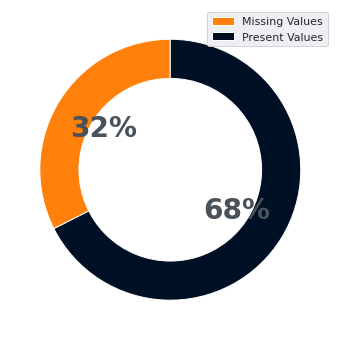

In [76]:
plt.figure(figsize = (8,6))
circle = plt.Circle((0,0), 0.7, color='white')
plt.pie(recovered, autopct='%0.f%%', startangle=90, colors=["#FF800B", "#001024"],
        textprops={
            "fontsize": 28,
            "fontweight": "bold",
            "color": "#495159"})
p=plt.gcf()
p.gca().add_artist(circle)

plt.legend(names)

plt.show()

In [33]:
fullDataFrame["Broj oporavljenih osoba"].count()

231